In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('cluster_table.csv')

In [4]:
dataset.head()

,X,Y,Z,Cluster label
0,1.014886,0.750362,1.156124,1.0
1,-0.197795,0.362302,0.884961,1.0
2,0.628812,2.889340,0.019449,1.0
3,0.642886,2.423315,0.329615,1.0
4,2.197576,-0.903305,1.581067,1.0


In [5]:
dataset['X'].notnull().count()

200

In [5]:
dataset.dropna()

,X,Y,Z,Cluster label
0,1.014886,0.750362,1.156124,1.0
1,-0.197795,0.362302,0.884961,1.0
2,0.628812,2.889340,0.019449,1.0
3,0.642886,2.423315,0.329615,1.0
4,2.197576,-0.903305,1.581067,1.0
...,...,...,...,...
195,-2.632380,-1.488830,1.370976,4.0
196,-0.106465,-1.362546,-2.064586,4.0
197,-0.887951,-4.282630,0.127685,4.0
198,-1.428415,-4.006279,0.428246,4.0


In [6]:
dataset.describe()

,X,Y,Z,Cluster label
count,200.000000,200.000000,200.000000,200.00000
mean,1.308909,1.546920,2.811882,2.50000
std,1.610548,3.298881,4.299736,1.12084
min,-2.917279,-5.722291,-3.576157,1.00000
25%,0.221763,-0.448100,0.209162,1.75000
50%,1.470579,1.476830,1.080962,2.50000
75%,2.569618,4.053052,3.836479,3.25000
max,3.875920,7.102241,12.035278,4.00000


In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [8]:
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4.]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[20  0  0  0]
 [ 0 25  0  0]
 [ 0  0 17  0]
 [ 0  0  0 18]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        25
         3.0       1.00      1.00      1.00        17
         4.0       1.00      1.00      1.00        18

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 1.0


In [14]:
classifier.predict([[2.197576,-0.903305,1.581067]])

array([2.])

In [15]:
classifier.score(X,y)

0.755

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[20  0  0  0]
 [ 0 25  0  0]
 [ 0  0 17  0]
 [ 0  0  0 18]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        25
         3.0       1.00      1.00      1.00        17
         4.0       1.00      1.00      1.00        18

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [18]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

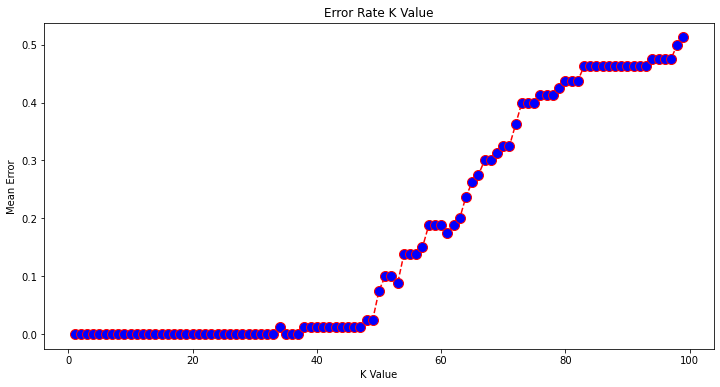

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [20]:
from sklearn.datasets import make_blobs
import numpy as np
#import matplotlib.pyplot as plt

(-20.0, 20.0)

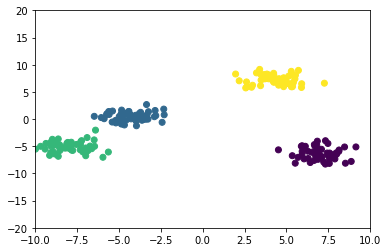

In [21]:
dataset = make_blobs(n_samples=200, n_features=4, centers=4, cluster_std=1.0, random_state=15)
# create np array for data points
points = dataset[0]
# create scatter plot
plt.scatter(dataset[0][:,0], dataset[0][:,1], c=dataset[1], cmap='viridis')

plt.xlim(-10,10)
plt.ylim(-20,20)

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
np.array

<function numpy.array>

AttributeError: 'tuple' object has no attribute 'iloc'

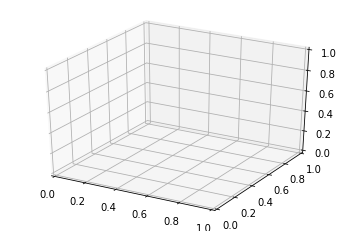

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array[dataset.iloc[:,0]]
y = np.array[dataset.iloc[:,1]]
z = np.array[dataset.iloc[:,2]]

ax.scatter(x,y,z, marker="s", c=df["Cluster"], s=40, cmap="RdBu")

plt.show()